# Evaluation per experimental parameter 

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_visualizations import flatten_data, plots_per_condition, filter_data, plot_combined_boxplots, descreptives
import csv

# remove waringns
import warnings
warnings.filterwarnings("ignore")

## Load data for evaluation: Filter for one experimental parameter

In [2]:
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)

# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', data.astype(str).duplicated().sum())


data.head()

Shape of data (1200, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,20,...,0.866526,0.025,1.0,0.962943,2,1,5,4,1,7
1,rf,200,100000,8,0,identity,5,5,200,20,...,0.851083,0.025,1.0,0.952666,3,1,5,3,1,5
2,rf,200,100000,8,0,identity,5,5,200,20,...,0.892708,0.025,1.0,0.955146,2,1,7,3,1,6
3,rf,200,100000,8,0,identity,5,5,200,20,...,0.858054,0.025,1.0,0.954002,2,1,4,2,1,6
4,rf,200,100000,8,0,identity,5,5,200,20,...,0.847100,0.025,1.0,0.940897,3,1,6,4,1,5


Filter for one variable:

In [3]:
parameter_grid = {
    "model_info_model": 'rf',
    "model_info_transformation": 'identity',
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": None,
    "model_info_scoring": 'neg_mean_squared_error'
}

data_filtered_1, data_filtered_2, value1, value2, filtered_parameter = filter_data(data, conditions= parameter_grid, value1= 0, value2 =3)

path_evaluation_tables = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/tables/"
path_evaluation_plots = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/plots/"

if not os.path.exists(path_evaluation_tables + filtered_parameter):
    os.makedirs(path_evaluation_tables + filtered_parameter)
    print('Folder for tables created:', filtered_parameter)

if not os.path.exists(path_evaluation_plots + filtered_parameter):
    os.makedirs(path_evaluation_plots + filtered_parameter)
    print('Folder for plots created:', filtered_parameter)

data_filtered_1 shape: (50, 75)
data_filtered_2 shape: (50, 75)


## Descriptives
#### Single variables, no dictionnaries/lists
* repetition', 'random_state', 'hyperparameters_same'  
* 'running_time_unstratified', 'running_time_stratified', 'running_time_repetition', 'cv_unstratified_iterations_mean_fit_time'  


In [4]:
#  'hyperparameters_same'
hyp_same1 = data_filtered_1['hyperparameters_same'].value_counts()
hyp_diff_rel1= hyp_same1[0]/(hyp_same1[0]+hyp_same1[1])
print(filtered_parameter, value1, hyp_same1)
print(hyp_diff_rel1)

hyp_same2 = data_filtered_2['hyperparameters_same'].value_counts()
hyp_diff_rel2= hyp_same2[0]/(hyp_same2[0]+hyp_same2[1])
print(filtered_parameter, value2, hyp_same2)
print(hyp_diff_rel2)

model_info_noise 0 hyperparameters_same
False    36
True     14
Name: count, dtype: int64
0.72
model_info_noise 3 hyperparameters_same
False    43
True      7
Name: count, dtype: int64
0.86


#### cv_folds_descreptives_stratified

In [69]:
def descreptives(data, path_plots):
    statistics = ['ks_statistic', 'p_value', 'intersection_area']
    mean_stratified_list = []
    sd_stratified_list = []
    mean_unstratified_list = []
    sd_unstratified_list = []
    mean_diff = []

    for s in statistics:
        # filter stratified and unstratified descreptives columns
        s_stratified = '_stratified_' + s
        s_unstratified = '_unstratified_' + s
        s_stratified = [col for col in data.columns if s_stratified in col]
        s_unstratified = [col for col in data.columns if s_unstratified in col]

        plot_combined_boxplots(data_x= data[s_stratified], data_y = data[s_unstratified], title= s, path=path_plots + '_' + s)
        
        # values for stratified
        mean_stratified = data[s_stratified].mean()[0]
        sd_stratified = data[s_stratified].std()[0]
        mean_stratified_list.append(mean_stratified)
        sd_stratified_list.append(sd_stratified)

        # values for unstratified
        mean_unstratified = data[s_unstratified].mean()[0]
        sd_unstratified = data[s_unstratified].std()[0]
        mean_unstratified_list.append(mean_unstratified)
        sd_unstratified_list.append(sd_unstratified)

        # diference
        mean_diff.append(mean_stratified - mean_unstratified)
    df_result = pd.DataFrame({'mean_stratified': mean_stratified_list, 'sd_stratified': sd_stratified_list, 
                              'mean_unstratified': mean_unstratified_list, 'sd_unstratified_list': sd_unstratified_list, 
                              'mean_diff' : mean_diff},
                              index= statistics)
    
    return df_result


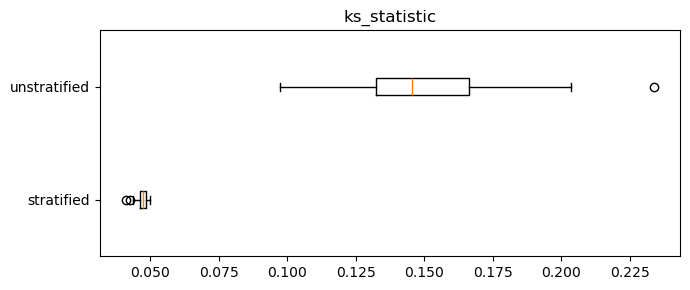

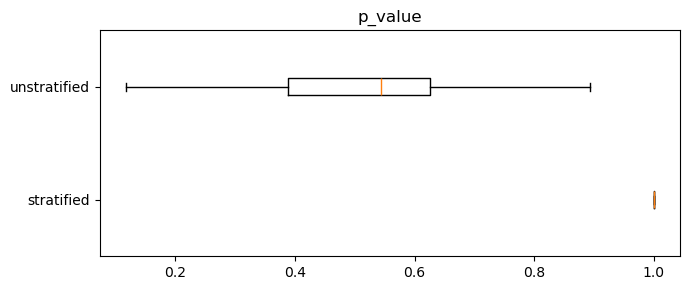

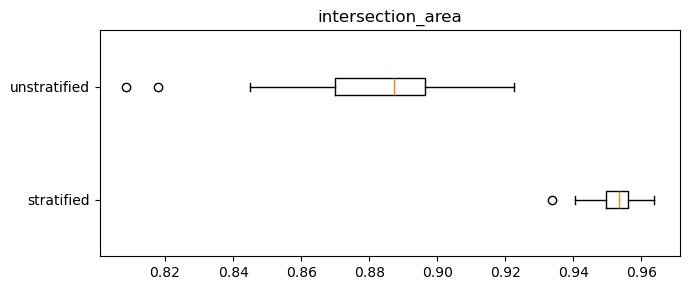

In [70]:
result_descreptives1 = descreptives(data_filtered_1, path_evaluation_plots + filtered_parameter + '_' + str(value1))

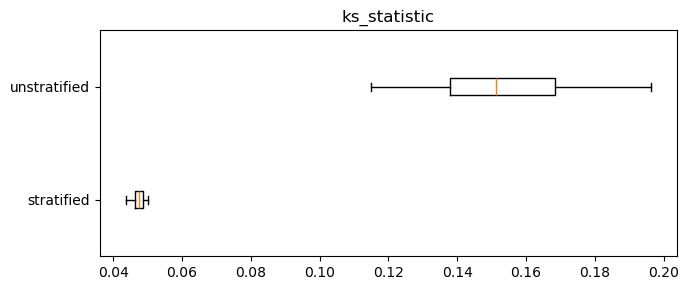

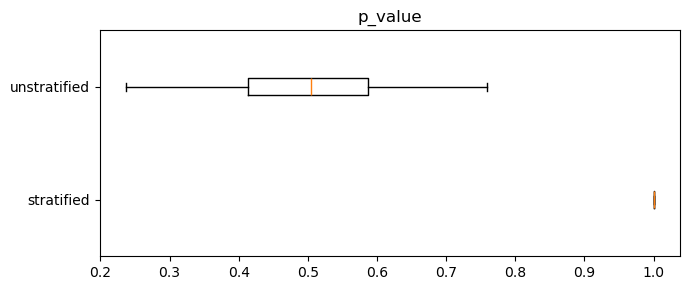

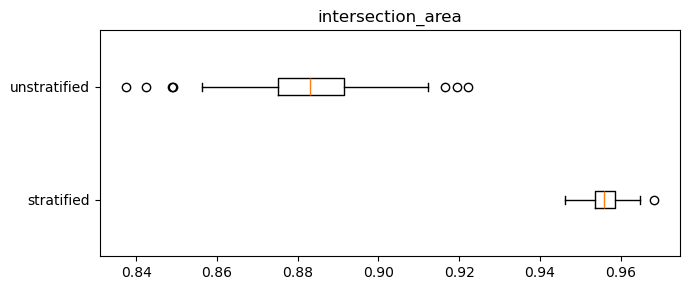

In [71]:
result_descreptives2 = descreptives(data_filtered_2, path_evaluation_plots + filtered_parameter + '_' + str(value2))

In [72]:
print(filtered_parameter, value1) 
result_descreptives1

model_info_noise 0


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified_list,mean_diff
ks_statistic,0.046875,0.001790,0.150225,0.027261,-0.10335
p_value,0.999997,0.000001,0.515217,0.163481,0.48478
intersection_area,0.952790,0.005425,0.882710,0.022700,0.07008


In [73]:
print(filtered_parameter, value2) 
result_descreptives2

model_info_noise 3


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified_list,mean_diff
ks_statistic,0.047250,0.001637,0.151075,0.019558,-0.103825
p_value,0.999996,0.000001,0.500711,0.122117,0.499285
intersection_area,0.955964,0.004601,0.882697,0.019056,0.073267


### Negative MSE

In [86]:
print(filtered_parameter, value1)
MSE1_unstratified = np.mean(data_filtered_1['cv_unstratified_iterations_mean_test_score'].explode().tolist())
SD1_unstratified = np.sqrt(np.var(data_filtered_1['cv_unstratified_iterations_std_test_score'].explode().tolist()))
MSE1_stratified = np.mean(data_filtered_1['cv_stratified_iterations_mean_test_score'].explode().tolist())
SD1_stratified = np.sqrt(np.var(data_filtered_1['cv_stratified_iterations_std_test_score'].explode().tolist()))

print(f"Unstratified: Negative MSE {MSE1_unstratified} with sd of  {SD1_unstratified}")
print(f"Stratified: Negative MSE {MSE1_stratified} with sd of {SD1_stratified}")

model_info_noise 0
Unstratified: Negative MSE -7.342140485839941 with sd of  0.6327620689545628
Stratified: Negative MSE -7.253491485365511 with sd of 0.40938968836568257


In [87]:
print(filtered_parameter, value2)
MSE2_unstratified = np.mean(data_filtered_2['cv_unstratified_iterations_mean_test_score'].explode().tolist())
SD2_unstratified = np.sqrt(np.var(data_filtered_2['cv_unstratified_iterations_std_test_score'].explode().tolist()))
MSE2_stratified = np.mean(data_filtered_2['cv_stratified_iterations_mean_test_score'].explode().tolist())
SD2_stratified = np.sqrt(np.var(data_filtered_2['cv_stratified_iterations_std_test_score'].explode().tolist()))

print(f"Unstratified: Negative MSE {MSE2_unstratified} with sd of  {SD2_unstratified}")
print(f"Stratified: Negative MSE {MSE2_stratified} with sd of {SD2_stratified}")

model_info_noise 3
Unstratified: Negative MSE -16.37041632641388 with sd of  1.2864157922574107
Stratified: Negative MSE -16.093685139043103 with sd of 0.9536441065676486


In [90]:
print(filtered_parameter)
MSE_diff1 = MSE1_stratified - MSE1_unstratified
MSE_diff2 = MSE2_stratified - MSE2_unstratified

SD_diff1 = SD1_stratified - SD1_unstratified  #@TBD
SD_diff2 = SD2_stratified - SD2_unstratified  #@TBD

print(f"Difference in MSE with {filtered_parameter} = {value1} : {MSE_diff1}")
print(f"Difference in MSE {filtered_parameter} = {value2} : {MSE_diff2}")

print(f"Difference in SD with {filtered_parameter} = {value1} : {SD_diff1}")
print(f"Difference in SD {filtered_parameter} = {value2} : {SD_diff2}")


model_info_noise
Difference in MSE with model_info_noise = 0 : 0.08864900047443047
Difference in MSE model_info_noise = 3 : 0.2767311873707783
Difference in SD with model_info_noise = 0 : -0.2233723805888802
Difference in SD model_info_noise = 3 : -0.332771685689762


In [96]:

def plot_combined_boxplots(data_x, data_y, title, path):
    # check data format
    data_x = np.array(data_x).flatten()
    data_y = np.array(data_y).flatten()
    # plot boxplots
    _, ax = plt.subplots(figsize=(7, 3))
    ax.boxplot([data_x, data_y], vert=False, labels=['stratified', 'unstratified'], showfliers=False)
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(path)
    plt.show()

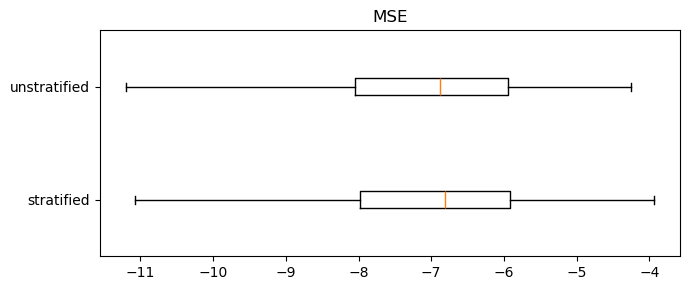

In [97]:
plot_combined_boxplots(data_filtered_1['cv_stratified_iterations_mean_test_score'].explode().tolist(), data_filtered_1['cv_unstratified_iterations_mean_test_score'].explode().tolist(), title = 'MSE', path= path_evaluation_plots + filtered_parameter + '_' + str(value1) + '_MSE')

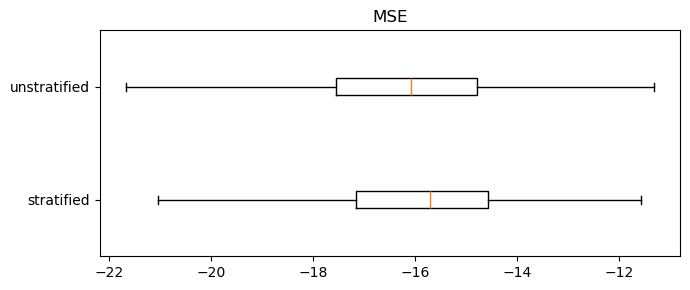

In [98]:
plot_combined_boxplots(data_filtered_2['cv_stratified_iterations_mean_test_score'].explode().tolist(), data_filtered_2['cv_unstratified_iterations_mean_test_score'].explode().tolist(), title = 'MSE', path= path_evaluation_plots + filtered_parameter + '_' + str(value2) + '_MSE')

In [127]:
from scipy.stats import spearmanr

def spearman_correlation(data):
    correlation_coefficient_list = []
    p_value_list = []

    # Calculate Spearman's correlation coefficient and p-value for each iteration
    for i in range(len(data['cv_stratified_iterations_mean_test_score'])):
        correlation_coefficient, p_value = spearmanr(np.array(data['cv_stratified_iterations_rank_test_score'])[i], np.array(data['cv_unstratified_iterations_rank_test_score'])[i])
        correlation_coefficient_list.append(correlation_coefficient)
        p_value_list.append(p_value)

    # Print the mean and variance of the correlation coefficient
    print("Mean of correlation coefficient:", np.mean(correlation_coefficient_list))
    print("Variance of correlation coefficient:", np.var(correlation_coefficient_list))

    # Print the mean and variance of the p-value
    print("Mean of p-value:", np.mean(p_value_list))
    print("Variance of p-value:", np.var(p_value_list))

In [132]:
print(filtered_parameter, value1)
spearman_correlation(data_filtered_1)

model_info_noise 0
Mean of correlation coefficient: 0.9927740435432939
Variance of correlation coefficient: 4.868099181213047e-05
Mean of p-value: 1.1411648546576423e-113
Variance of p-value: 6.381060404978408e-225


In [134]:
print(filtered_parameter, value2)
spearman_correlation(data_filtered_2)

model_info_noise 3
Mean of correlation coefficient: 0.9746346511933741
Variance of correlation coefficient: 0.00029854029862043797
Mean of p-value: 9.682372512645322e-88
Variance of p-value: 4.589859600610807e-173


#### Error of Estimator

In [162]:
def error_estimator(data, path):
    gen_error_stratified_list = []
    gen_error_unstratified_list = []

    for i in range(len(data)):
        # generalisation error: stratified
        gen_error_stratified = np.array(data['cv_iteration_refit_test_mse'])[i] + np.array(data['cv_stratified_iterations_mean_test_score'])[i]
        gen_error_stratified_list.append(gen_error_stratified)
        # generalisation error: unstratified
        gen_error_unstratified = np.array(data['cv_iteration_refit_test_mse'])[i] + np.array(data['cv_unstratified_iterations_mean_test_score'])[i]
        gen_error_unstratified_list.append(gen_error_unstratified)

    mean_stratified = np.mean(gen_error_stratified_list)
    sd_stratified = np.sqrt(np.var(gen_error_stratified_list))
    mean_unstratified = np.mean(gen_error_unstratified_list)
    sd_unstratified = np.sqrt(np.var(gen_error_unstratified_list))
    mean_diff = mean_stratified - mean_unstratified
    sd_diff = sd_stratified - sd_unstratified

    #data frame
    df_result = pd.DataFrame({'mean_stratified': mean_stratified, 'sd_stratified': sd_stratified, 
                                'mean_unstratified': mean_unstratified, 'sd_unstratified': sd_unstratified,
                                'mean_diff': mean_diff, 'sd_diff': sd_diff},
                                index= ['gen_error'])


    # plot gen_error_stratified and gen_error_unstratified in two boxplots next to each other
    plot_combined_boxplots(gen_error_stratified_list, gen_error_unstratified_list, title = 'Error of Estimator', path= path)
    return df_result


model_info_noise 0


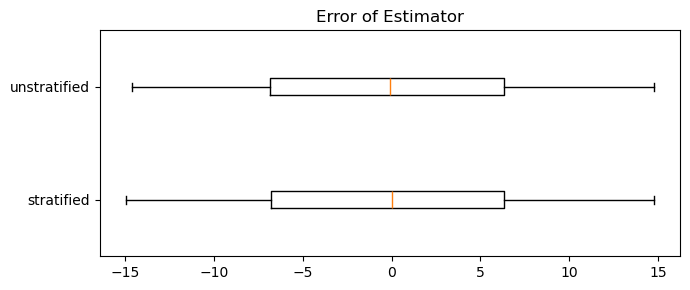

In [163]:
print(filtered_parameter, value1)
error_estimator1 = error_estimator(data_filtered_1, path = path_evaluation_plots + filtered_parameter + '_' + str(value1) + '_estimator_error')

model_info_noise 3


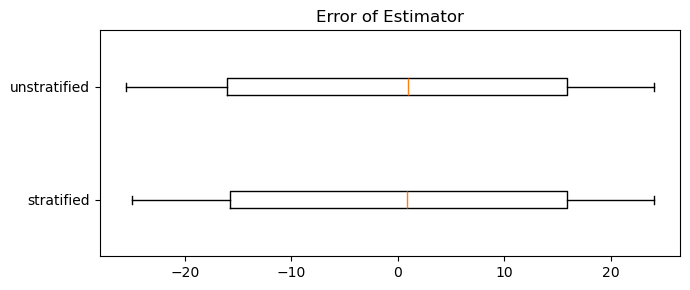

In [164]:
print(filtered_parameter, value2)
error_estimator2 = error_estimator(data_filtered_2, path = path_evaluation_plots + filtered_parameter + '_' + str(value2) + '_estimator_error')

In [168]:
print(filtered_parameter, value1)
error_estimator1 

model_info_noise 0


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified,mean_diff,sd_diff
gen_error,-0.227513,7.283969,-0.271838,7.330435,0.044325,-0.046466


In [169]:
print(filtered_parameter, value2)
error_estimator2

model_info_noise 3


,mean_stratified,sd_stratified,mean_unstratified,sd_unstratified,mean_diff,sd_diff
gen_error,0.114711,16.329148,-0.023655,16.471575,0.138366,-0.142427


Best Hyperparmetrs: TBD

#### Boxplots Evaluation metrics:  'unstratified_results' and 'stratified_results'

data_filtered_1 shape: (50, 75)
data_filtered_2 shape: (50, 75)


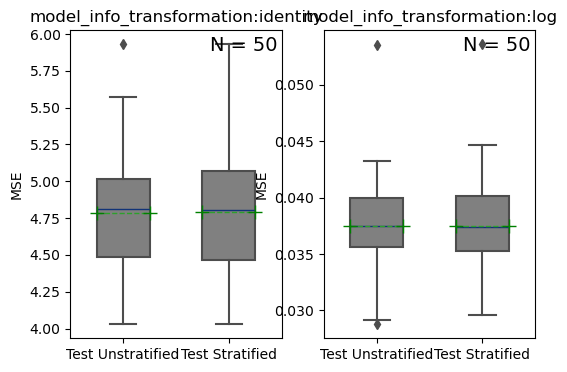

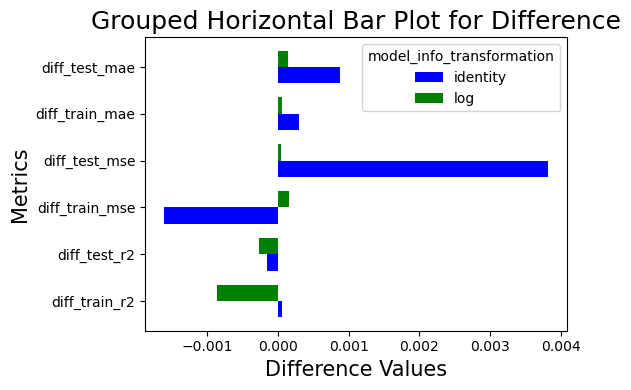

                mean_diff   sd_diff
diff_train_r2    0.000060  0.005371
diff_test_r2    -0.000160  0.003793
diff_train_mse  -0.001607  0.124604
diff_test_mse    0.003816  0.090564
diff_train_mae   0.000298  0.045240
diff_test_mae    0.000883  0.015442
                mean_diff   sd_diff
diff_train_r2   -0.000863  0.012239
diff_test_r2    -0.000267  0.004666
diff_train_mse   0.000159  0.001954
diff_test_mse    0.000043  0.000746
diff_train_mae   0.000060  0.006005
diff_test_mae    0.000138  0.001164


In [171]:
parameter_grid = {
    "model_info_model": 'rf',
    "model_info_transformation": None,
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": 0,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 'identity'
value2 = 'log'

df1, df2 = plots_per_condition(data, parameter_grid, value1, value2)
print(df1)
print(df2)

(50, 75)
(50, 75)


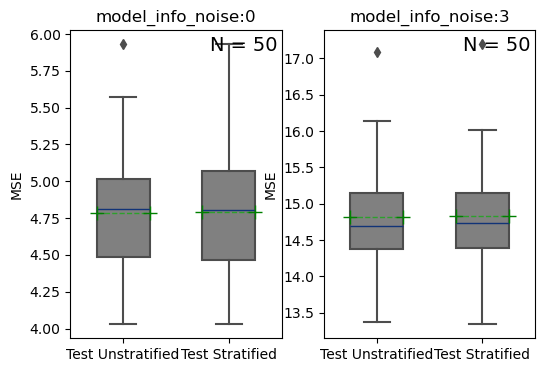

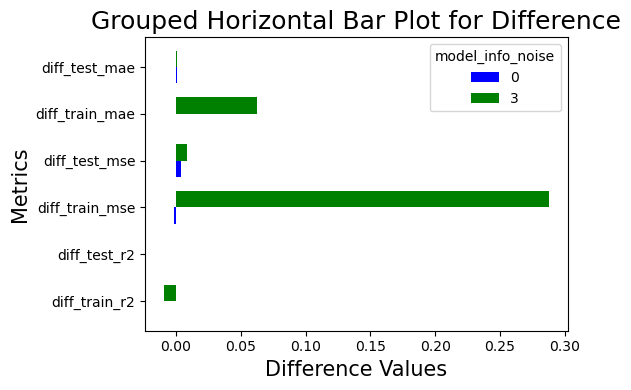

                mean_diff   sd_diff
diff_train_r2    0.000060  0.005371
diff_test_r2    -0.000160  0.003793
diff_train_mse  -0.001607  0.124604
diff_test_mse    0.003816  0.090564
diff_train_mae   0.000298  0.045240
diff_test_mae    0.000883  0.015442
                mean_diff   sd_diff
diff_train_r2   -0.008950  0.027635
diff_test_r2    -0.000254  0.006462
diff_train_mse   0.287431  0.896281
diff_test_mse    0.008353  0.212184
diff_train_mae   0.062309  0.187077
diff_test_mae    0.001168  0.021947


In [23]:
parameter_grid = {
    "model_info_model": 'rf',
    "model_info_transformation": 'identity',
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": None,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 0
value2 = 3

df1, df2 = plots_per_condition(data, parameter_grid, value1, value2)
print(df1)
print(df2)

In [ ]:
def save_metrics_to_csv(file_path, model_name, mae_error, mse_error, mae_per_channel, mse_per_channel, mae_per_frame, mse_per_frame, mae_derivative, mse_derivative, fvd_metric, mae_optical_flow, mse_optical_flow):
    timestamp = datetime.now().strftime('%Y-%m-%d--%H-%M-%S')
    header = ['timestamp', 'model_name', 'mae', 'mse', 'mae_per_channel', 'mse_per_channel', 'mae_per_frame', 'mse_per_frame', 'mae_derivative', 'mse_derivative', 'fvd_metric', 'mae_optical_flow', 'mse_optical_flow']
    data = [timestamp, model_name, mae_error, mse_error, mae_per_channel, mse_per_channel, mae_per_frame, mse_per_frame, mae_derivative, mse_derivative, fvd_metric, mae_optical_flow, mse_optical_flow]

    if not os.path.exists(file_path):
        with open(file_path, 'w', newline='') as f:
            csv_writer = csv.writer(f)
            csv_writer.writerow(header)
        
    with open(file_path, 'a', newline='') as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(data)

    
    
    
    
    
    with open(path_evaluation_tables + filtered_parameter, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        # Writing an empty row to ensure the file is not completely empty
        csv_writer.writerow([])